In [26]:
import scipy.stats
import numpy as np
import pandas as pd  
import seaborn as sns
from scipy.stats import kstest, skew, kurtosis, laplace
import matplotlib.pyplot as plt    

In [7]:
df = pd.read_excel('./data/IPC.xlsx')
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             0 non-null      float64       
 1   Unnamed: 1             0 non-null      float64       
 2   Date                   1162 non-null   datetime64[ns]
 3   IPC                    1162 non-null   float64       
 4   Rendimientos IPC       1161 non-null   float64       
 5   Unnamed: 5             0 non-null      float64       
 6   Oil                    1162 non-null   float64       
 7   Rendimientos Petróleo  1161 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 72.8 KB
None
       Unnamed: 0  Unnamed: 1                           Date           IPC  \
count         0.0         0.0                           1162   1162.000000   
mean          NaN         NaN  2017-07-01 04:17:45.748709120  45765.966821   
min  

In [8]:
# Formatear el DataFrame
df = df[['Date', 'Rendimientos IPC']]
df.set_index('Date', inplace=True)
df = df.drop(df.index[0])
print(df.head())

            Rendimientos IPC
Date                        
2015-01-05         -0.010606
2015-01-06          0.002424
2015-01-07          0.005062
2015-01-08          0.006069
2015-01-09         -0.000204


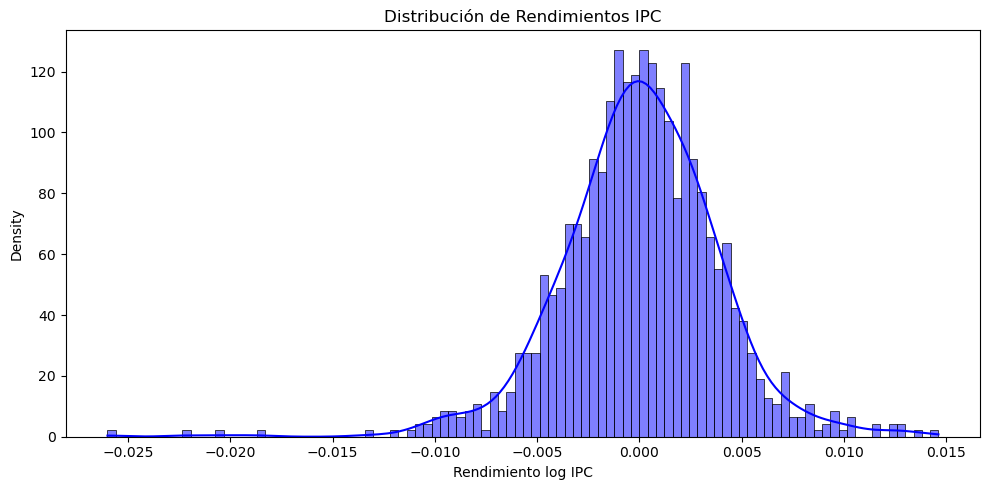

In [23]:
# --- Histograma ---
plt.figure(figsize=(10, 5))
sns.histplot(df["Rendimientos IPC"], bins=100, kde=True, stat="density", color="blue")
plt.title("Distribución de Rendimientos IPC")
plt.xlabel("Rendimiento log IPC")
plt.tight_layout()
plt.show()

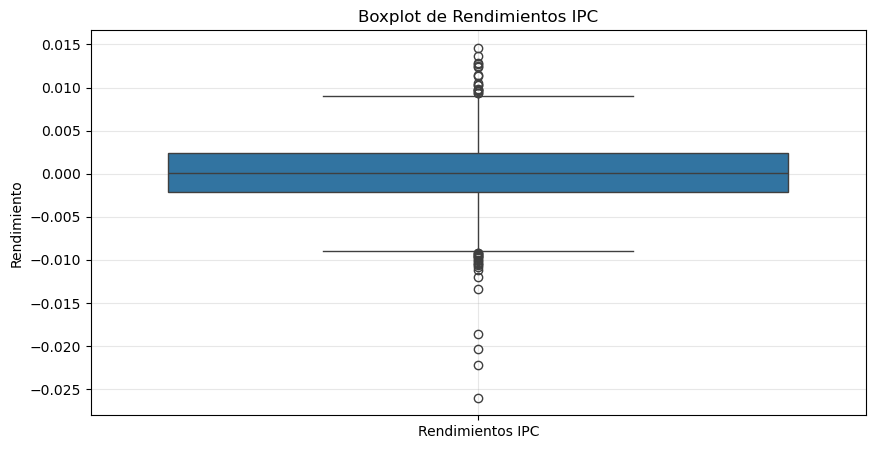

In [19]:
# --- Boxplot ---
plt.figure(figsize=(10, 5))
sns.boxplot(df, vert=True, patch_artist=True)
plt.title("Boxplot de Rendimientos IPC")
plt.ylabel("Rendimiento")
plt.grid(alpha=0.3)
plt.show()

In [24]:
# Curtosis
kurtosis = df.kurtosis()
print("Curtosis:", kurtosis)


Curtosis: Rendimientos IPC    3.963898
dtype: float64


In [ ]:
# --- Ajuste por MLE ---
datos = df.values.flatten()  # convertir a array
mu_mle = np.mean(datos)               # media MLE
sigma_mle = np.std(datos, ddof=0)     # desviación estándar MLE (ddof=0)

print(f"Media MLE: {mu_mle:.6f}")
print(f"Desviación estándar MLE: {sigma_mle:.6f}")

Media MLE: 0.000012
Desviación estándar MLE: 0.003893


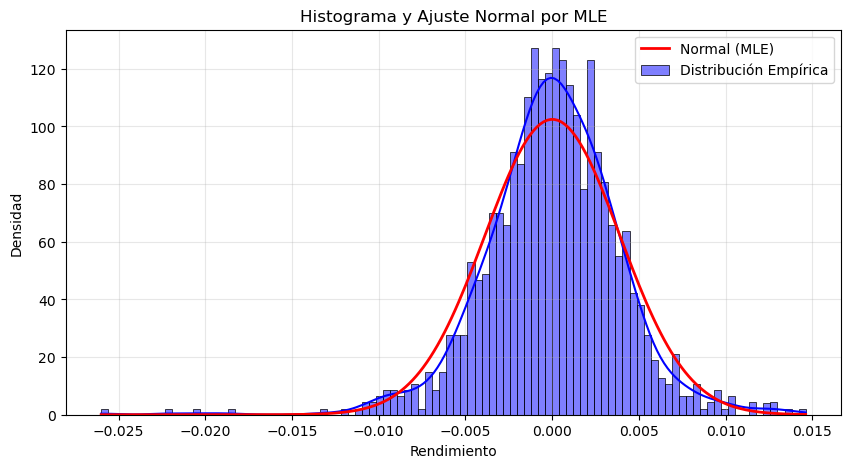

In [31]:
# --- Graficar histograma con densidad normal ---
plt.figure(figsize=(10, 5))
sns.histplot(df["Rendimientos IPC"], bins=100, kde=True, stat="density", color="blue", label='Distribución Empírica')
plt.title("Distribución de Rendimientos IPC")
plt.xlabel("Rendimiento log IPC")

# Curva de la normal ajustada
x = np.linspace(min(datos), max(datos), 200)
pdf = scipy.stats.norm.pdf(x, loc=mu_mle, scale=sigma_mle)
plt.plot(x, pdf, 'r-', lw=2, label='Normal (MLE)')

plt.title("Histograma y Ajuste Normal por MLE")
plt.xlabel("Rendimiento")
plt.ylabel("Densidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Curtosis
kurtosis = df.kurtosis()
print("Curtosis:", kurtosis)scipy.stats.norm.pdf(x, loc=mu_mle, scale=sigma_mle)